# Michał Filipiuk 385423
## GSN assignment 2

In [1]:
%load_ext autoreload
%autoreload 2

### Imports 

In [154]:
import numpy as np
import torch
from collections import Counter

from random import sample

from src.data_loading import *
from src.model import *
from src.corpus_preprocessor import CorpusPreprocessor
from src.plotting import *

### Setting env, loading data

In [3]:
config = load_config()
torch.cuda.set_device(config["DEVICE_NUMBER"])

sentences = read_sentences(config)
corpus_preprocessor = CorpusPreprocessor()

### Preprocessing

In [4]:
transformed_sentences = corpus_preprocessor.transform_text(sentences)

In [5]:
x = corpus_preprocessor.encode_text(corpus_preprocessor.mask_text(transformed_sentences))

### Starting NN

In [6]:
net = LanguageModel().cuda()

In [7]:
data_loader = DataLoader(x)

### Training

In [8]:
net.train(data_loader, n_epoch=1)

Starting training...
epoch: 1, lloss: -0.52072
0.684


## T-SNE

In [22]:
word_embedder = net.get_word_embedder()

In [52]:
words = " ".join(transformed_sentences).split()

In [53]:
cnt = Counter()
for w in words:
    cnt[w] += 1

I'd like to start with analyzing group of most popular 100 words. I split them by length into three subsets:
- x \>= 5
- 5 > x >= 2
- 2 > x

We start with medium length words:
T-SNE splits words into 15 different clusters accordingly to the first letter of words. It maybe related to my implementation of words embedding which is character-wise.

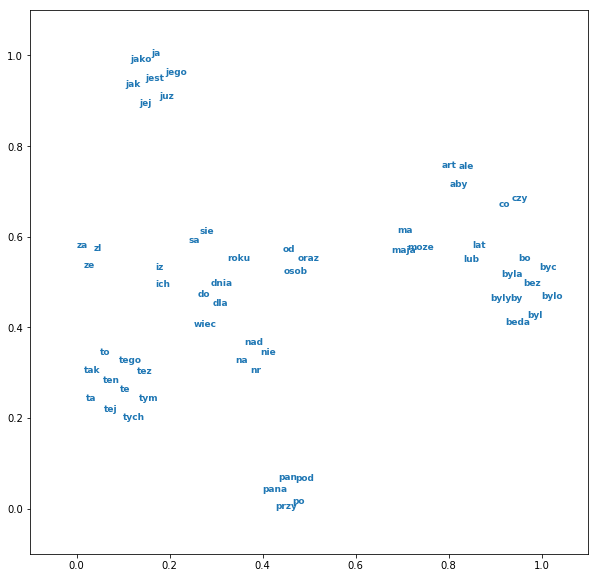

In [129]:
inputs = [a[0] for a in cnt.most_common(100) if len(a[0]) < 5 and len(a[0]) >= 2]
plot_embeddings(dict(zip(inputs,[0]*len(inputs))), corpus_preprocessor, word_embedder, learning_rate=300, perplexity=10, n_iter = 1000)

I couldn't find much about this dataset, but I'm pretty sure that it has a lot of sentences from political speeches (państwa, poseł, prawa, polski, pracy).   
We can see that words like który, która, które neatly keeps together, what is something that we would except.

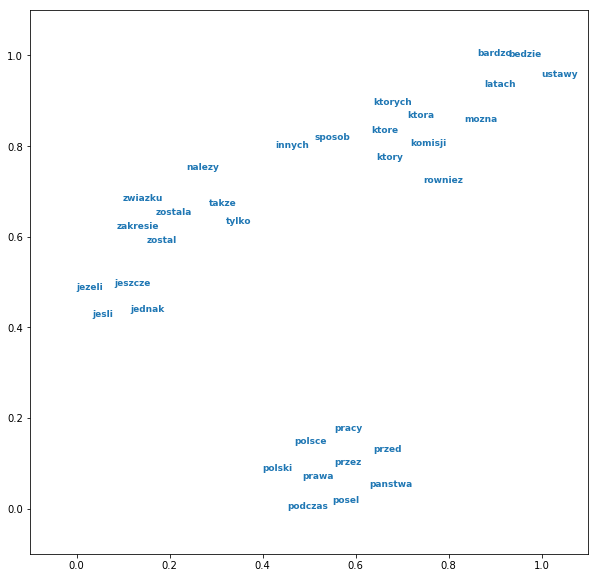

In [118]:
inputs = [a[0] for a in cnt.most_common(100) if len(a[0]) >= 5]
plot_embeddings(dict(zip(inputs,[0]*len(inputs))), corpus_preprocessor, word_embedder, learning_rate=200, perplexity=9, n_iter = 420)

Ok, so at the end we have the one letter words. There are too little of them to analyze any relationships - I could juggle with hyperparameters to get the desired outcome.

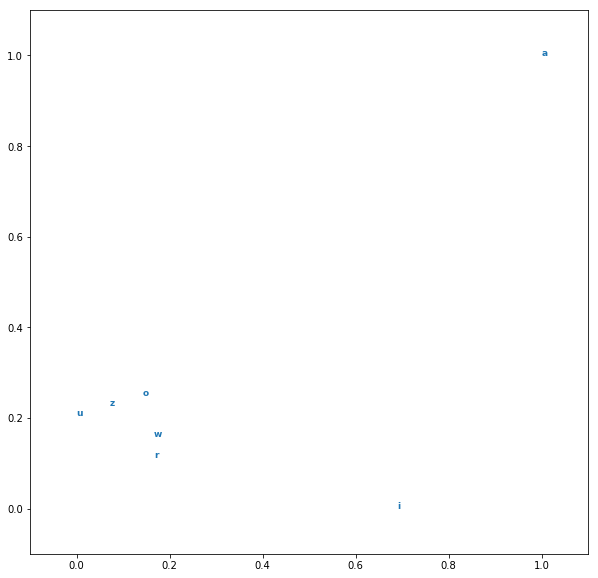

In [139]:
inputs = [a[0] for a in cnt.most_common(100) if len(a[0]) < 2]
plot_embeddings(dict(zip(inputs,[0]*len(inputs))), corpus_preprocessor, word_embedder, learning_rate=1, perplexity=10, n_iter = 250)

In [141]:
male_names = ["Aaron","Adam","Adrian","Alan","Albert",
"Alek",
"Aleks",
"Aleksander",
"Aleksy",
"Alex",
"Alexander",
"Alfred",
"Allan",
"Alojzy",
"Amadeusz",
"Amir",
"Anastazy",
"Anatol",
"Andrzej",
"Antoni",
"Ariel",
"Arkadiusz",
"Armin",
"Aron",
"Artur",
"Aureliusz",
"Bartłomiej",
"Bartosz",
"Bastian",
"Beniamin",
"Benjamin",
"Bernard",
"Błażej",
"Bogumił",
"Bolesław",
"Borys",
"Bożydar",
"Brajan",
"Brayan",
"Brian",
"Bronisław",
"Bruno",
"Bryan",
"Cezary",
"Colin",
"Cyprian",
"Cyryl",
"Czesław",
"Damian",
"Daniel",
"Darek",
"Dariusz",
"David",
"Dawid",
"Denis",
"Dezyderiusz",
"Diego",
"Dobromił",
"Dominik",
"Dorian",
"Edward",
"Eliasz",
"Emanuel",
"Emil",
"Emilian",
"Ernest",
"Erwin",
"Eryk",
"Eugeniusz",
"Eustachy",
"Fabian",
"Feliks",
"Felix",
"Filip",
"Florian",
"Franciszek",
"Fryderyk",
"Gabriel",
"Gniewko",
"Gniewomir",
"Gracjan",
"Grzegorz",
"Gustaw",
"Henryk",
"Heronim",
"Hubert",
"Hugo",
"Ignacy",
"Igor",
"Ireneusz",
"Ivo",
"Iwo",
"Jacek",
"Jacob",
"Jakub",
"Jan",
"Janusz",
"Jarosław",
"Jeremi",
"Jeremiasz",
"Jerzy",
"Jędrzej",
"Joachim",
"Joda",
"Jonasz",
"Jonatan",
"Jonathan",
"Józef",
"Julian",
"Juliusz",
"Kacper",
"Kajetan",
"Kamil",
"Karol",
"Kasjan",
"Kasper",
"Kaspian",
"Kazimierz",
"Kevin",
"Kewin",
"Klaudiusz",
"Klemens",
"Konrad",
"Konstanty",
"Kordian",
"Kornel",
"Korneliusz",
"Kosma",
"Kryspin",
"Krystian",
"Krzesimir",
"Krzysztof",
"Ksawery",
"Ksawier",
"Kuba",
"Leo",
"Leon",
"Leonard",
"Leonardo",
"Leopold",
"Leszek",
"Lew",
"Longin",
"Lucjan",
"Ludwik",
"Łazarz",
"Łukasz",
"Maciej",
"Maks",
"Maksym",
"Maksymilian",
"Marcel",
"Marceli",
"Marcin",
"Marek",
"Marian",
"Mariusz",
"Martin",
"Mateusz",
"Maurycy",
"Max",
"Maximilian",
"Maxymilian",
"Michael",
"Michał",
"Mieszko",
"Mikołaj",
"Milan",
"Miłosz",
"Miron",
"Mirosław",
"Natan",
"Nataniel",
"Nathan",
"Nathaniel",
"Nicolas",
"Nikodem",
"Nikolas",
"Norbert",
"Oktawian",
"Olaf",
"Oleg",
"Olgierd",
"Oliver",
"Olivier",
"Oliwer",
"Oliwier",
"Oscar",
"Oskar",
"Patryk",
"Paweł",
"Philip",
"Piotr",
"Polikarp",
"Przemysław",
"Radosław",
"Rafał",
"Remigiusz",
"Robert",
"Roch",
"Roman",
"Ryan",
"Ryszard",
"Samuel",
"Sebastian",
"Sergiusz",
"Seweryn",
"Sławomir",
"Stanisław",
"Stefan",
"Sylwester",
"Szczepan",
"Szymon",
"Tadeusz",
"Teodor",
"Teofil",
"Tobiasz",
"Tomasz",
"Tymon",
"Tymoteusz",
"Tytus",
"Victor",
"Viktor",
"Vincent",
"Wacław",
"Walenty",
"Wawrzyniec",
"Wiktor",
"Wincent",
"Wincenty",
"Witold",
"Władysław",
"Wojciech",
"Xavier",
"Xawery",
"Yoda",
"Zachariasz",
"Zbigniew",
"Zenon",
"Ziemowit",
"Zorian",
"Zygmunt",
"Żelisław"]

What can we say this time? Once again we can see how words concentrates around the same letters

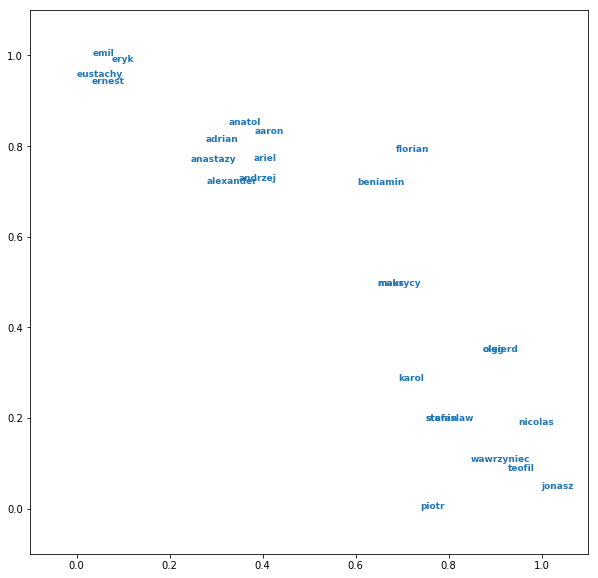

In [179]:
male_names_processed = sample(corpus_preprocessor.transform_text(male_names), 25)
plot_embeddings(dict(zip(male_names_processed,[0]*len(male_names_processed))), corpus_preprocessor, word_embedder, learning_rate=15, perplexity=10, n_iter = 500)

Let's add some female names

In [180]:
female_names = ["Ada",
"Adela",
"Adriana",
"Adrianna",
"Agata",
"Agnieszka",
"Alana",
"Aleksandra",
"Alessandra",
"Alexandra",
"Alia",
"Alice",
"Alicja",
"Alina",
"Alisa",
"Aisha",
"Amalia",
"Amanda",
"Amelia",
"Amélia",
"Anastasiia",
"Anastazja",
"Anatolia",
"Andrea",
"Andżelika",
"Aneta",
"Angelika",
"Aniela",
"Anita",
"Anna",
"Antonia",
"Antonina",
"Apolonia",
"Arletta",
"Arleta",
"Asia",
"Asteria",
"Aurelia",
"Aurora",
"Aya",
"Ayla",
"Balbina",
"Barbara",
"Beata",
"Berenika",
"Bernadetta",
"Bianka",
"Blanka",
"Bogda",
"Bogna",
"Bogumiła",
"Bogusława",
"Cameron",
"Carla",
"Carolina",
"Carmen",
"Cataleya",
"Chanel",
"Chanell",
"Cecylia",
"Celina",
"Chiara",
"Czesława",
"Dagmara",
"Daisy",
"Daniela",
"Danuta",
"Daria",
"Dąbrówka",
"Debora",
"Diana",
"Dobrosława",
"Dominika",
"Dorota",
"Edyta",
"Eftalia",
"Ellen",
"Elisabeth",
"Elena",
"Eleonora",
"Elif",
"Eliza",
"Elwira",
"Eltefia",
"Elzna",
"Elżbieta",
"Emilia",
"Emily",
"Emma",
"Erna",
"Estera",
"Ewa",
"Ewelina",
"Fatima",
"Faustyna",
"Felicja",
"Filomena",
"Florencja",
"Florentyna",
"Franciszka",
"Francesca",
"Gabriela",
"Gaja",
"Genowefa",
"Gloria",
"Giulia",
"Gizela",
"Grace",
"Greta",
"Halina",
"Hana",
"Hanna",
"Hannah",
"Helen",
"Helena",
"Honorata",
"Hortensja",
"Ida",
"Idalia",
"Iga",
"Ilona",
"Ina",
"Ines",
"Inez",
"Inga",
"Ingrid",
"Inka",
"Irena",
"Irene",
"Iris",
"Irmina",
"Isabelle",
"Ismena",
"Iwona",
"Ivana",
"Ivanka",
"Iza",
"Izabela",
"Izabella",
"Izyda",
"Jadwiga",
"Jagna",
"Jagoda",
"Jana",
"Janette",
"Janina",
"Jaśmina",
"Leah",
"Leokadia",
"Jessica",
"Joanna",
"Jola",
"Jolanta",
"Josephine",
"Jowita",
"Józefa",
"Judyta",
"Julia",
"Julianna",
"Julita",
"Justyna",
"Kaja",
"Kalina",
"Kamila",
"Karina",
"Karen",
"Karolina",
"Kasjana",
"Kataleja",
"Katarzyna",
"Kayla",
"Kinga",
"Kesja",
"Klara",
"Klaudia",
"Klementyna",
"Konstancja",
"Kornelia",
"Krystyna",
"Ksenia",
"Lara",
"Larysa",
"Laura",
"Lea",
"Lena",
"Letycja",
"Lidia",
"Lila",
"Lili",
"Lilia",
"Liliana",
"Lilianna",
"Lilla",
"Lilly",
"Lily",
"Livia",
"Liwia",
"Liza",
"Lola",
"Lucyna",
"Luiza",
"Luna",
"Łucja",
"Magda",
"Magdalena",
"Maja",
"Malina",
"Malika",
"Malwina",
"Malvina",
"Małgorzata",
"Marcela",
"Marcelina",
"Marcjanna",
"Margerita",
"Margarita",
"Maria",
"Marianna",
"Marietta",
"Marica",
"Marika",
"Marina",
"Marisa",
"Mary",
"Marysia",
"Marlena",
"Marta",
"Martyna",
"Marzanna",
"Marzena",
"Masza",
"Matylda",
"Maya",
"Megan",
"Melania",
"Melisa",
"Melody",
"Mercedes",
"Mia",
"Michalina",
"Michaela",
"Mija",
"Mila",
"Milla",
"Milena",
"Miłosława",
"Mira",
"Miranda",
"Miriam",
"Mirosława",
"Monika",
"Molly",
"Nadia",
"Nadja",
"Nadine",
"Natalia",
"Natasza",
"Nathalie",
"Nel",
"Nela",
"Neli",
"Nicol",
"Nicola",
"Nicole",
"Nikola",
"Nila",
"Nina",
"Noemi",
"Noelia",
"Odetta",
"Oda",
"Odeta",
"Oksana",
"Oktawia",
"Ola",
"Olga",
"Olimpia",
"Olivia",
"Oliwia",
"Otylia",
"Pamela",
"Patrycja",
"Patricia",
"Paula",
"Paulina",
"Pelagia",
"Penelope",
"Pola",
"Renata",
"Regina",
"Rita",
"Roksana",
"Roma",
"Rose",
"Rozalia",
"Róża",
"Ruta",
"Sabina",
"Salma",
"Salomea",
"Samanta",
"Samira",
"Sandecja",
"Sandra",
"Sara",
"Sarah",
"Sasha",
"Scarlett",
"Simona",
"Selena",
"Sława",
"Sofia",
"Sofiia",
"Sonia",
"Sonja",
"Sophia",
"Sophie",
"Susanna",
"Suzanne",
"Stanisława",
"Stefania",
"Stella",
"Sybilla",
"Sylwia",
"Syntia",
"Synthia",
"Tamara",
"Tatiana",
"Teresa",
"Tina",
"Tola",
"Uma",
"Urszula",
"Vanessa",
"Vera",
"Veronika",
"Veronica",
"Victoria",
"Viktoria",
"Viktoriia",
"Violetta",
"Wanda",
"Wanessa",
"Wera",
"Weronika",
"Wiera",
"Wiktoria",
"Wioletta",
"Yasmine",
"Zinaida",
"Zoe",
"Zenobia",
"Zeynep",
"Zlata",
"Zofia",
"Zoja",
"Zuza",
"Zuzanna",
"Zyta",
"Żaklina",
"Żaneta"]

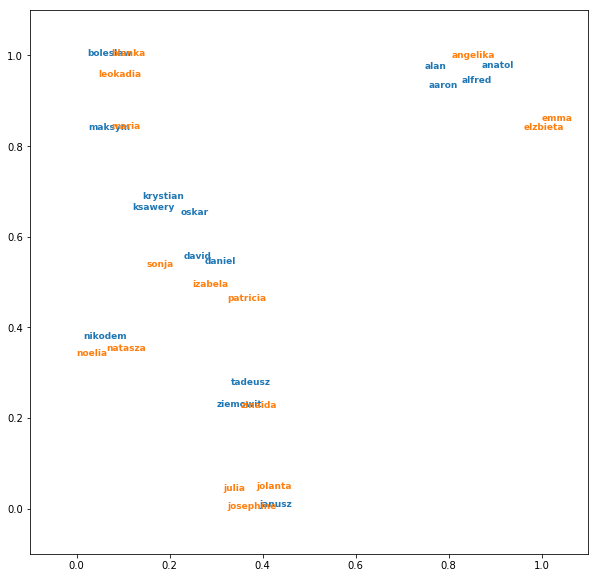

In [310]:
male_names_processed = sample(corpus_preprocessor.transform_text(male_names), 15)
female_names_processed = sample(corpus_preprocessor.transform_text(female_names), 15)
plot_embeddings(dict(**dict(zip(male_names_processed,[0]*len(male_names_processed))),**dict(zip(female_names_processed,[2]*len(female_names_processed)))), corpus_preprocessor, word_embedder, learning_rate=35, perplexity=4, n_iter = 450)

Well, it's complicated. I couldn't find any way to cluster female and male names separately. They still split by letters but we can quite clearly see how female names are a bit separate from male in those letter clusters.

In [315]:
polish_cities = ["Gdynia", "Częstochowa", "Radom", "Sosnowiec", "Toruń", "Kielce", "Rzeszów", "Gliwice", "Zabrze", "Olsztyn", "Bielsko-Biała", "Bytom", "Zielona Góra", "Rybnik", "Ruda Śląska", "Tychy", "Opole", "Gorzów Wielkopolski", "Dąbrowa Górnicza", "Elbląg", "Płock", "Wałbrzych", "Włocławek", "Tarnów", "Chorzów", "Koszalin", "Kalisz", "Warszawa", "Kraków", "Łódź", "Wrocław", "Poznań", "Gdańsk", "Szczecin", "Bydgoszcz", "Lublin", "Białystok", "Katowice"]

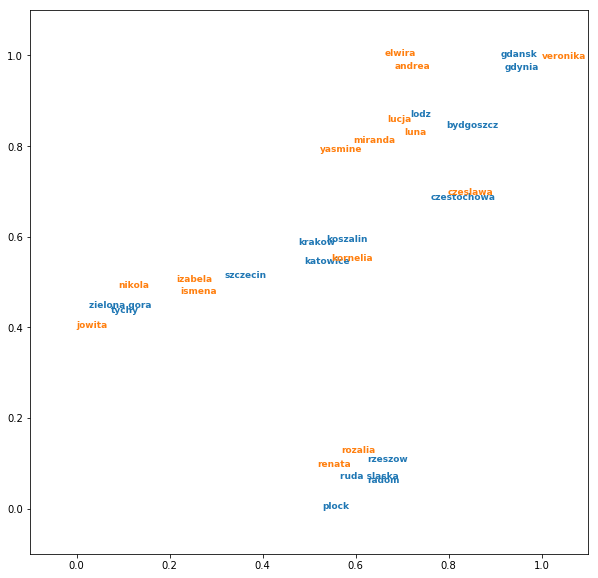

In [336]:
polish_cities_processed = sample(corpus_preprocessor.transform_text(polish_cities), 15)
female_names_processed = sample(corpus_preprocessor.transform_text(female_names), 15)
plot_embeddings(dict(**dict(zip(polish_cities_processed,[0]*len(polish_cities_processed))),**dict(zip(female_names_processed,[2]*len(female_names_processed)))), corpus_preprocessor, word_embedder, learning_rate=25, perplexity=5, n_iter = 500)

Once again, looks very similary :P

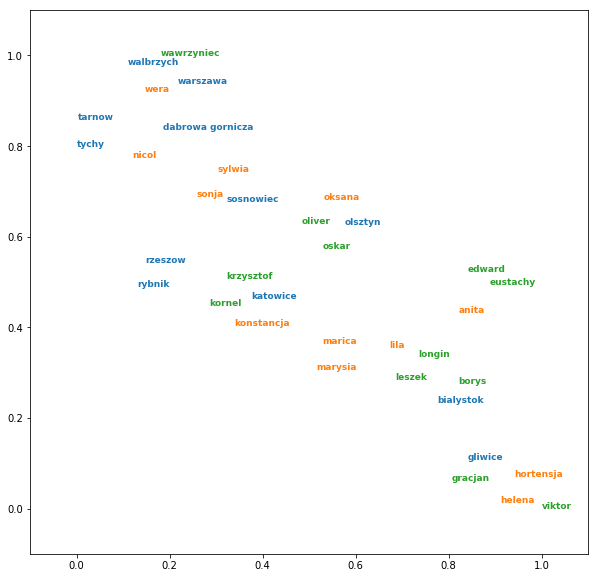

In [354]:
polish_cities_processed = sample(corpus_preprocessor.transform_text(polish_cities), 12)
female_names_processed = sample(corpus_preprocessor.transform_text(female_names), 12)
male_names_processed = sample(corpus_preprocessor.transform_text(male_names), 12)
plot_embeddings(dict(**dict(zip(polish_cities_processed,[0]*len(polish_cities_processed))),**dict(zip(female_names_processed,[2]*len(female_names_processed))),**dict(zip(male_names_processed,[4]*len(male_names_processed)))), corpus_preprocessor, word_embedder, learning_rate=250, perplexity=10, n_iter = 1500)

And again - first letter becomes most important in clustering

I don't know if this model is powerful enough to show any different relation. It maybe caused with using words that model didn't have a chance to see any time